<img src="https://i.imgur.com/RGQekkH.png" alt="alt text" width="300" height="300">


**Authored by Shashank Raj using Gemini AI ✨.**

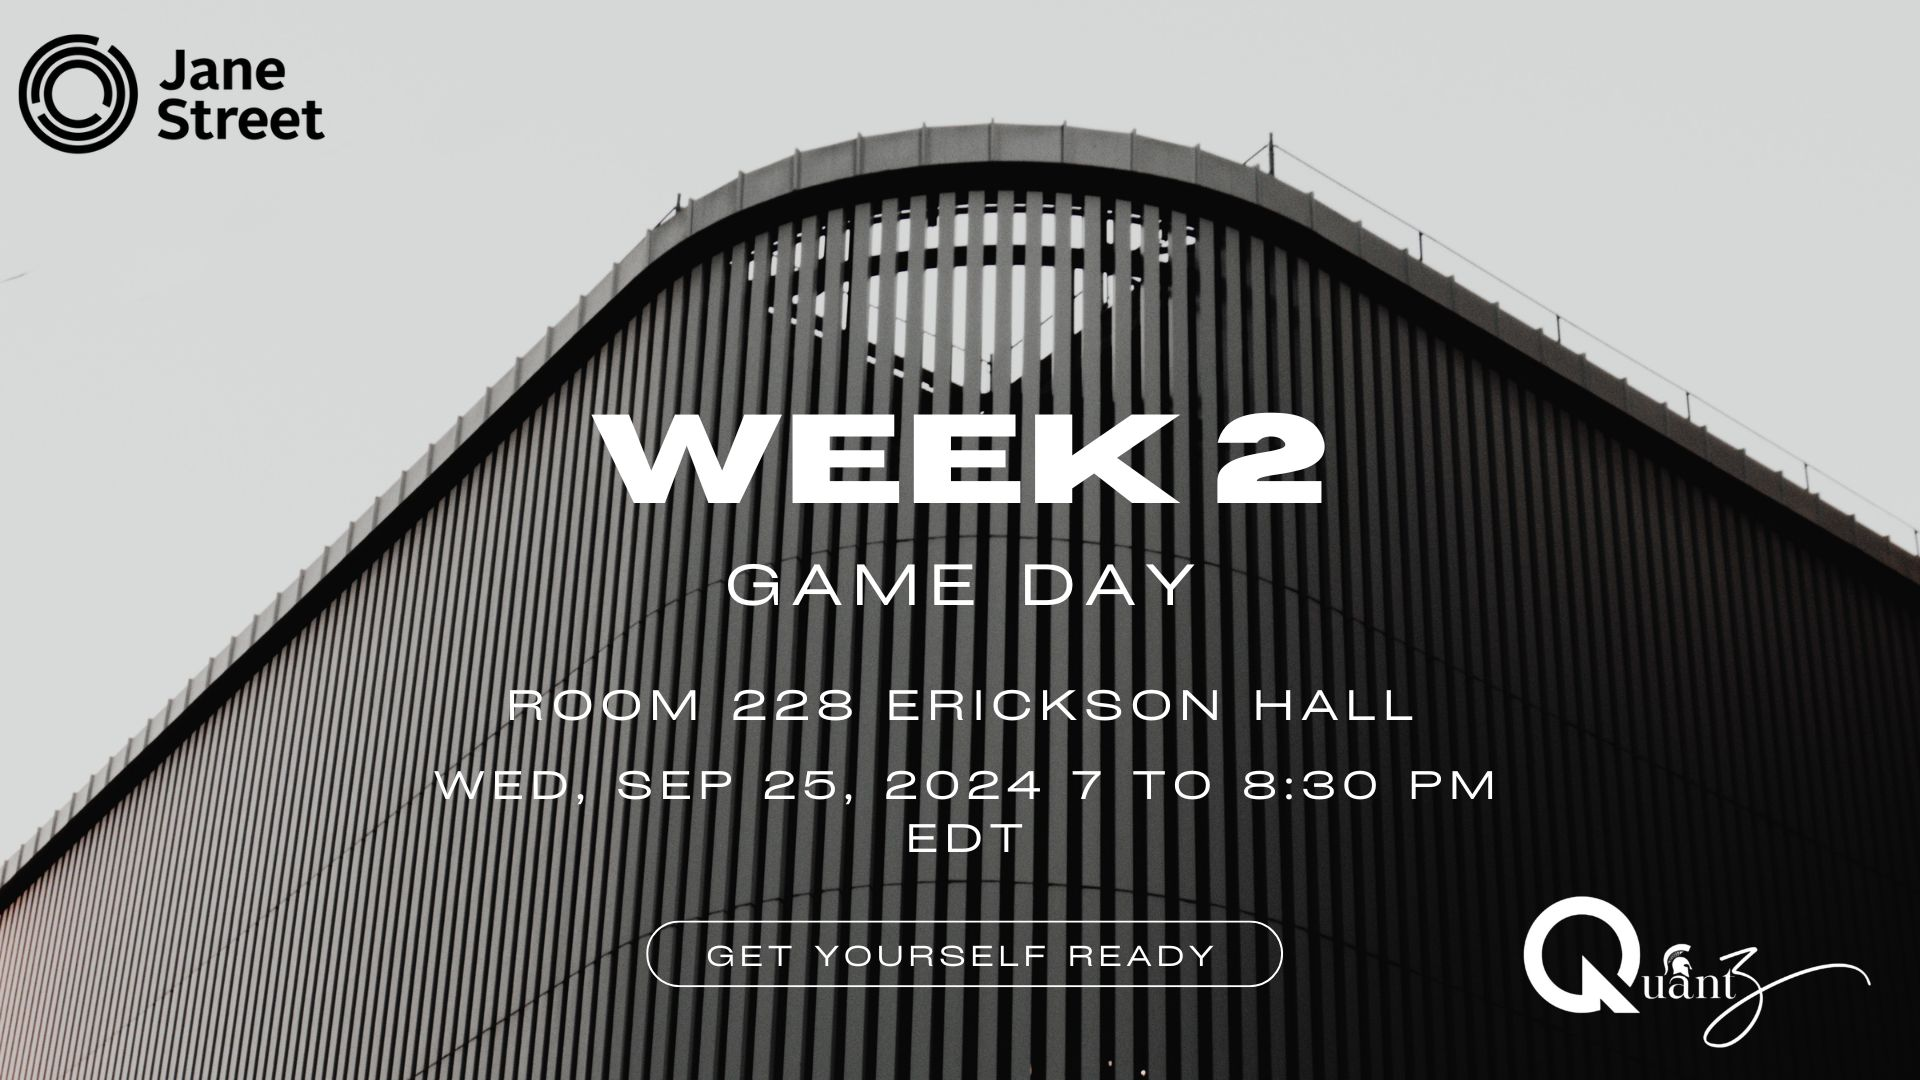

# 🎲 QUANTZ OPTIONS TRADING SIMULATOR

In [ ]:
# @title QuantZ Options (Simplified Edition) Game {"display-mode":"form"}

# Trading Simulator in One Cell with Interactive Interface

# Install and import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import ipywidgets as widgets
from ipywidgets import VBox, HBox, Layout, Output
import time

# Initialize the simulator
def trading_simulator():
    # Initial parameters
    initial_capital = 10000  # Initial capital in dollars
    capital = initial_capital
    portfolio = {}  # Holds the user's option positions
    underlying_price = 100  # Starting price of the underlying stock
    time_steps = 20  # Total number of rounds
    volatility = 0.05  # Volatility of the underlying asset
    capital_history = [initial_capital]  # Track capital over time
    round_number = 1  # Current round

    # Output widget to display messages
    output = Output()

    # Widgets for user interaction
    action_widget = widgets.Dropdown(
        options=[('Buy', 'B'), ('Sell', 'S'), ('Pass', 'P')],
        value='B',
        description='Action:',
    )
    option_index_widget = widgets.IntSlider(
        value=0,
        min=0,
        max=6,
        step=1,
        description='Option Index:',
        disabled=False
    )
    quantity_widget = widgets.IntText(
        value=1,
        description='Quantity:',
        disabled=False
    )
    next_button = widgets.Button(
        description='Execute Trade & Continue',
        button_style='success',
        tooltip='Click to proceed to the next round',
    )

    # Function to simulate price
    def simulate_price(current_price):
        return current_price * np.exp(np.random.normal(0, volatility))

    # Function to generate option chain
    def generate_option_chain(current_price, time_to_expiry):
        strikes = [current_price * (1 + i * 0.05) for i in range(-3, 4)]
        options = []
        for strike in strikes:
            option_type = 'Call' if strike >= current_price else 'Put'
            intrinsic_value = max(0, current_price - strike) if option_type == 'Call' else max(0, strike - current_price)
            time_value = np.random.uniform(1, 5)
            premium = round(intrinsic_value + time_value, 2)
            option = {
                'Type': option_type,
                'Strike': round(strike, 2),
                'Expiry': time_to_expiry,
                'Premium': premium
            }
            options.append(option)
        return pd.DataFrame(options)

    # Main trading function
    def next_round(b):
        nonlocal capital, underlying_price, round_number, portfolio, capital_history

        with output:
            clear_output(wait=True)
            print(f"Round {round_number}/{time_steps}")
            print(f"Current Capital: ${capital:.2f}")

            # Simulate underlying price movement
            underlying_price = simulate_price(underlying_price)
            print(f"Underlying Stock Price: ${underlying_price:.2f}\n")

            # Generate option chain
            option_chain = generate_option_chain(underlying_price, time_steps - round_number)
            print("Option Chain:")
            display(option_chain)

            # Get user inputs
            action = action_widget.value
            option_index = option_index_widget.value
            quantity = quantity_widget.value

            if action in ['B', 'S']:
                try:
                    selected_option = option_chain.iloc[option_index]
                    total_premium = selected_option['Premium'] * quantity * 100  # Multiply by 100 shares per contract
                    key = (selected_option['Type'], selected_option['Strike'], selected_option['Expiry'])

                    if action == 'B':
                        if total_premium > capital:
                            print("Insufficient capital!")
                        else:
                            capital -= total_premium
                            portfolio[key] = portfolio.get(key, 0) + quantity
                            print(f"Bought {quantity} contract(s) of {selected_option['Type']} option at strike ${selected_option['Strike']} for ${total_premium:.2f}")
                    elif action == 'S':
                        if portfolio.get(key, 0) >= quantity:
                            capital += total_premium
                            portfolio[key] -= quantity
                            if portfolio[key] == 0:
                                del portfolio[key]
                            print(f"Sold {quantity} contract(s) of {selected_option['Type']} option at strike ${selected_option['Strike']} for ${total_premium:.2f}")
                        else:
                            print("You don't have enough contracts to sell!")
                except Exception as e:
                    print("Invalid input, please try again.")
            else:
                print("Passing this round.")

            # Option expiry handling
            expired_options = [key for key in portfolio if key[2] == 0]
            for key in expired_options:
                option_type, strike, expiry = key
                qty = portfolio[key]
                intrinsic_value = max(0, underlying_price - strike) if option_type == 'Call' else max(0, strike - underlying_price)
                payoff = intrinsic_value * qty * 100  # Assuming 100 shares per contract
                capital += payoff
                print(f"\nOption {option_type} at strike ${strike} has expired.")
                print(f"Payoff from expired option: ${payoff:.2f}")
                del portfolio[key]

            # Update portfolio expiry
            portfolio = {key: qty for key, qty in portfolio.items() if key[2] > 0}
            portfolio = {(key[0], key[1], key[2] - 1): qty for key, qty in portfolio.items()}

            # Display portfolio
            if portfolio:
                print("\nCurrent Portfolio:")
                for key, qty in portfolio.items():
                    option_type, strike, expiry = key
                    print(f"{qty} contract(s) of {option_type} option at strike ${strike}, expires in {expiry} rounds.")
            else:
                print("Your portfolio is empty.")

            # Track capital
            capital_history.append(capital)

            round_number += 1

            # Check if the game is over
            if round_number > time_steps:
                print("\nGame Over!")
                print(f"Final Capital: ${capital:.2f}")
                profit = capital - initial_capital
                print(f"Total Profit/Loss: ${profit:.2f}")

                # Creative rating algorithm
                if profit > 5000:
                    rating = "Trading Genius 🤑"
                elif profit > 2000:
                    rating = "Market Maverick 🚀"
                elif profit > 0:
                    rating = "Profit Pioneer 💰"
                elif profit == 0:
                    rating = "Break-even Bandit 😐"
                elif profit > -2000:
                    rating = "Learning Trader 📘"
                else:
                    rating = "Risky Businessman 💣"

                print(f"Your Rating: {rating}")

                # Fun penalties
                if capital < initial_capital:
                    penalty = initial_capital - capital
                    print(f"Oops! You lost ${penalty:.2f}. Better luck next time!")
                else:
                    print("Great job! You increased your capital!")

                # Plot the capital history
                plt.figure(figsize=(10, 6))
                plt.plot(capital_history, marker='o')
                plt.title('Capital Over Time')
                plt.xlabel('Round')
                plt.ylabel('Capital ($)')
                plt.grid(True)
                plt.show()

                # Disable widgets after the game ends
                action_widget.disabled = True
                option_index_widget.disabled = True
                quantity_widget.disabled = True
                next_button.disabled = True

    # Bind the function to the button
    next_button.on_click(next_round)

    # Display the interactive widgets
    display(VBox([action_widget, option_index_widget, quantity_widget, next_button, output]))

# Run the simulator
trading_simulator()


# 🎟️ Monte Carlo Lottery

In [ ]:
# @title Monte Carlo Lottery Game (Base Version) with Animations {"display-mode":"form"}


# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from ipywidgets import VBox, HBox, Layout
import random

# Define the Monte Carlo Lottery Game
def monte_carlo_lottery():
    # Initial setup
    initial_balance = 1000  # Starting virtual money
    balance = initial_balance
    rounds = 10  # Total rounds
    current_round = 1
    balance_history = [initial_balance]

    # Output widgets for displaying messages and animations
    output = widgets.Output()
    animation_output = widgets.Output()

    # Widgets for user interaction
    bet_amount_widget = widgets.IntSlider(
        value=10,
        min=10,
        max=100,
        step=10,
        description='Bet Amount:',
        style={'description_width': 'initial'},
        continuous_update=False
    )

    number_choice_widget = widgets.IntSlider(
        value=1,
        min=1,
        max=10,
        step=1,
        description='Choose a Number (1-10):',
        style={'description_width': 'initial'},
        continuous_update=False
    )

    play_button = widgets.Button(
        description='Play Round',
        button_style='success',
        tooltip='Click to play the round',
        icon='play'
    )

    # Function to display the animated lottery draw
    def display_animation(chosen_number, winning_number):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.axis('off')
        balls = list(range(1, 11))
        random.shuffle(balls)
        ball_positions = [(i % 5, i // 5) for i in range(10)]

        def animate(i):
            ax.clear()
            ax.set_xlim(-1, 5)
            ax.set_ylim(-1, 2)
            ax.axis('off')
            for idx in range(i+1):
                x, y = ball_positions[idx]
                ball_num = balls[idx]
                color = 'gold' if ball_num == winning_number else 'skyblue'
                circle = plt.Circle((x, y), 0.4, color=color, ec='black')
                ax.add_patch(circle)
                ax.text(x, y, str(ball_num), fontsize=16, ha='center', va='center')
            ax.set_title('Lottery Draw', fontsize=16)

        ani = animation.FuncAnimation(fig, animate, frames=10, interval=500, repeat=False)
        plt.close(fig)
        with animation_output:
            clear_output(wait=True)
            display(HTML(ani.to_jshtml()))

    # Function to simulate the lottery
    def play_round(b):
        nonlocal balance, current_round, balance_history

        with output:
            clear_output(wait=True)
            print(f"Round {current_round}/{rounds}")
            print(f"Current Balance: ${balance:.2f}\n")

        # Get user inputs
        bet_amount = bet_amount_widget.value
        chosen_number = number_choice_widget.value

        if bet_amount > balance:
            with output:
                print("Insufficient balance to place that bet!")
            return

        # Simulate the lottery draw using Monte Carlo method
        winning_number = np.random.randint(1, 11)

        # Display the animated lottery draw
        display_animation(chosen_number, winning_number)

        with output:
            print(f"You chose number: {chosen_number}")
            print(f"The winning number is: {winning_number}\n")

            # Determine win or loss
            if chosen_number == winning_number:
                # Big win: 10x payout
                winnings = bet_amount * 10
                balance += winnings
                print(f"🎉 Congratulations! You hit the jackpot and won ${winnings:.2f}! 🎉")
            elif abs(chosen_number - winning_number) == 1:
                # Close guess: 2x payout
                winnings = bet_amount * 2
                balance += winnings
                print(f"👍 Close guess! You won ${winnings:.2f}!")
            else:
                # Loss
                balance -= bet_amount
                print(f"😢 Sorry, you lost ${bet_amount:.2f}. Better luck next time!")

            balance_history.append(balance)
            current_round += 1

            # Check if the game is over
            if current_round > rounds or balance <= 0:
                print("\n🏁 Game Over! 🏁")
                print(f"Final Balance: ${balance:.2f}")
                total_profit = balance - initial_balance
                print(f"Total Profit/Loss: ${total_profit:.2f}")

                # Creative rating algorithm
                if total_profit > 500:
                    rating = "🎖️ Lottery Legend 🏆"
                elif total_profit > 200:
                    rating = "🍀 Lucky Gambler 🍀"
                elif total_profit > 0:
                    rating = "😊 Ahead Player 😊"
                elif total_profit == 0:
                    rating = "😐 Break-even Player 😐"
                elif total_profit > -200:
                    rating = "😕 Unlucky Player 😕"
                else:
                    rating = "😞 Down on Luck 😞"

                print(f"Your Rating: {rating}")

                # Plot the balance history
                fig, ax = plt.subplots(figsize=(10, 6))
                ax.plot(balance_history, marker='o', linestyle='-', color='gold')
                ax.set_title('Balance Over Time', fontsize=16)
                ax.set_xlabel('Round', fontsize=14)
                ax.set_ylabel('Balance ($)', fontsize=14)
                ax.grid(True)
                plt.show()

                # Disable widgets after the game ends
                bet_amount_widget.disabled = True
                number_choice_widget.disabled = True
                play_button.disabled = True
            else:
                print(f"New Balance: ${balance:.2f}")
                print("\nGet ready for the next round!")

    # Bind the play function to the button
    play_button.on_click(play_round)

    # Display the interactive widgets
    ui = VBox([
        HBox([bet_amount_widget, number_choice_widget]),
        play_button,
        output,
        animation_output
    ])

    display(ui)

# Run the Monte Carlo Lottery Game
monte_carlo_lottery()
